In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import argparse

Using TensorFlow backend.


In [2]:
IMG_PATH = ''

In [3]:
# Grab the mnist dataset, if this is your first time running this script , 
# download may take a minute -- the 55mb mnist dataset will be downloaded
dataset = datasets.fetch_mldata("MNIST Original")

In [ ]:
#import tensorflow.examples.tutorials.mnist.input_data as input_data
#m=input_data.read_data_sets("MNIST")

In [4]:
# Scale the raw pixel intensities to the range [0, 1.0], then construct 
# the training and testing splits
data = dataset.data.astype("float")/255.0
(trainX, testX, trainY, testY) = train_test_split(data,
    dataset.target, test_size=0.25)

In [5]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(52500, 784)
(52500,)
(17500, 784)
(17500,)


In [6]:
testY[:10]

array([5., 7., 2., 5., 2., 9., 1., 2., 9., 9.])

In [7]:
# Conver the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [8]:
trainY[:10]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [9]:
# Define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [14]:
model.summary()
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 3s 54us/step - loss: 2.2777 - acc: 0.1678 - val_loss: 2.2465 - val_acc: 0.3227
Epoch 2/100
52500/52500 [==============================] - 3s 52us/step - loss: 2.2160 - acc: 0.3660 - val_loss: 2.1836 - val_acc: 0.3929
Epoch 3/100
52500/52500 [==============================] - 3s 52us/step - loss: 2.1439 - acc: 0.4941 - val_loss: 2.1013 - val_acc: 0.5118
Epoch 4/100
52500/52500 [==============================] - 3s 54us/step - loss: 2.0463 - acc: 0.5677 - val_loss: 1.9865 - val_acc: 0.5697
Epoch 5/100
52500/52500 [==============================] - 3s 53us/step - loss: 1.9117 - acc: 0.6018 - val_loss: 1.8325 - val_acc: 0.6338
Epoch 6/100
52500/52500 [==============================] - 3s 52us/step - loss: 1.7412 - acc: 0.6448 - val_loss: 1.6491 - val_acc: 0.6526
Epoch 7/100
52500/52500 [==============================] - 3s 52us/step - loss: 1.5526 - acc: 0

In [19]:
# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
             precision    recall  f1-score   support

        0.0       0.95      0.96      0.95      1726
        1.0       0.95      0.97      0.96      1963
        2.0       0.91      0.89      0.90      1728
        3.0       0.91      0.88      0.89      1727
        4.0       0.91      0.94      0.92      1728
        5.0       0.87      0.86      0.87      1538
        6.0       0.93      0.95      0.94      1721
        7.0       0.93      0.93      0.93      1861
        8.0       0.89      0.88      0.88      1731
        9.0       0.91      0.89      0.90      1777

avg / total       0.92      0.92      0.92     17500



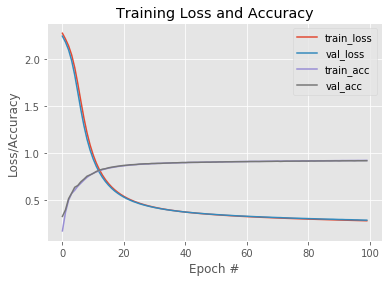

In [21]:
# Plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('keras_mnist.png')